In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [14]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m,dtype=int)
    for i in range(m):
      distance=[]
      for j in range(K):
        distance.append(np.linalg.norm(X[i]-centroids[j]))
      idx[i]=np.argmin(distance)
    return idx

In [16]:
def compute_centroids(X, idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in range(K):
      indices=X[idx==i]
      centroids[i]=np.mean(indices,axis=0)
    return centroids

In [6]:
def run_kMeans(X,initial_centroids,max_iter=10):
  K=initial_centroids.shape[0]
  centroids=initial_centroids
  idx=np.zeros(X.shape[0])
  for i in range(max_iter):
    idx=find_closest_centroids(X,centroids)
    centroids=compute_centroids(X,idx,K)
  return centroids,idx

In [7]:
def KMeans_init_centroids(X,K):
  randidx=np.random.permutation(X.shape[0])
  return X[randidx[:K]]

In [8]:
original_img=plt.imread('bird_small.png')
original_img.shape


(128, 128, 3)

In [9]:
original_img=original_img/255
img=original_img.reshape(original_img.shape[0]*original_img.shape[1],3)
img.shape

(16384, 3)

In [17]:
K=16
max_iters=10
initial_centroids=KMeans_init_centroids(img,K)
centroids,idx=run_kMeans(img,initial_centroids,max_iters)

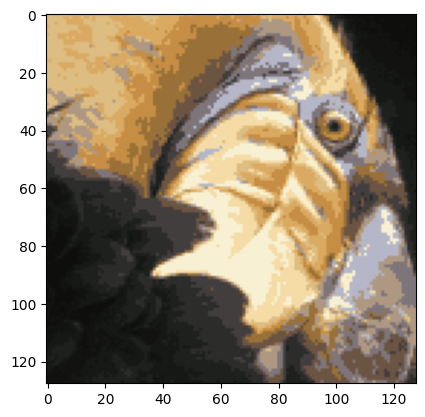

In [19]:
x_recovered=centroids[idx,:]
x_recovered=np.reshape(x_recovered,(original_img.shape[0],original_img.shape[1],3))
plt.imshow(x_recovered*255)